### Our Objective:

The main objective of this assignment is to conduct a thorough exploratory analysis of the "cardiographic.csv" dataset to uncover insights, identify patterns, and understand the dataset's underlying structure. You will use statistical summaries, visualizations, and data manipulation techniques to explore the dataset comprehensively.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Cardiotocographic.csv') #Loading the dataset

In [4]:
df.shape # checking no of rows & columns

(2126, 14)

In [5]:
df.head() # Displays the first 5 rows of the DataFrame

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [6]:
df.info() # Displays summary information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [7]:
df.isnull().sum() # Shows the total number of missing (null) values in each column

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [8]:
df.dropna(inplace=True) # Removes all rows containing any missing (null) values from the DataFrame permanently


In [9]:
df.isnull().sum() # again we did this to check if the changes took place 

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [10]:
df.duplicated().sum() # Returns the total number of duplicate rows in the DataFrame

np.int64(2)

In [11]:
df.drop_duplicates(inplace=True) #removes the duplicates

In [12]:
df.duplicated().sum() # total duplicates

np.int64(0)

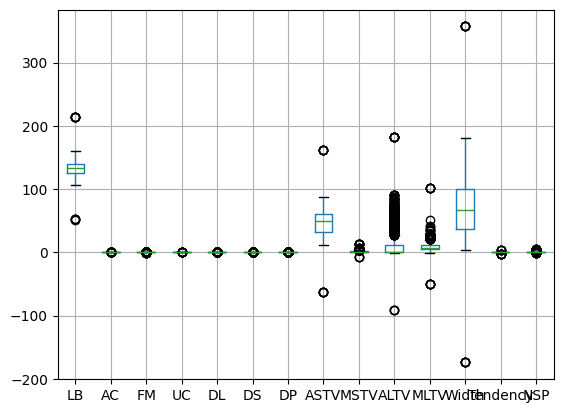

In [13]:
df.boxplot() #used to check the outliers
plt.show()

In [14]:
#outlier capping
def outlier_capping(df,column):
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR= Q3-Q1
    lower_extreme= Q1-1.5*IQR
    upper_extreme= Q3+1.5*IQR
    df[column]= df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)

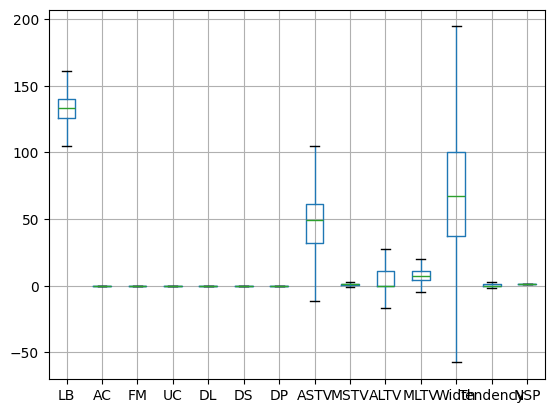

In [15]:
df.boxplot() # again used to ensure the outliers are being removed or not
plt.show()

In [16]:
df.agg(['mean','median','std']) # Calculates the mean, median, and standard deviation for all numeric columns
                                # agg fun is used to aggrigate multiple functions in one go

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
mean,133.291604,0.003144,0.001565,0.004361,0.001770,0.0,0.0,46.999304,1.301912,6.733464,8.017610,70.351685,0.319999,1.0
median,133.000000,0.001631,0.000000,0.004484,0.000000,0.0,0.0,49.000000,1.200000,0.000000,7.400000,67.486468,0.000000,1.0
std,9.976211,0.003844,0.002477,0.003008,0.002675,0.0,0.0,17.633594,0.779896,10.400402,5.094192,39.773195,0.624916,0.0


In [17]:
# Calculates the 25th percentile (Q1) of all numeric columns
Q1 = df.quantile(0.25)

# Calculates the 75th percentile (Q3) of all numeric columns
Q3 = df.quantile(0.75)

# Computes the Interquartile Range (IQR = Q3 - Q1)
IQR = Q3 - Q1

# Displays the IQR values for each numeric column
IQR

LB          14.000000
AC           0.005650
FM           0.002559
UC           0.004705
DL           0.003295
DS           0.000000
DP           0.000000
ASTV        29.000000
MSTV         1.000000
ALTV        11.000000
MLTV         6.300000
Width       63.000000
Tendency     1.000000
NSP          0.000000
dtype: float64

#### Key findings

LB (Baseline Fetal Heart Rate) → Stable around 133 BPM with low variation — a key consistent indicator.

ALTV (Abnormal Long-Term Variability) → Highly skewed (mean 6.7, median 0) — only a few abnormal cases.

ASTV (Accelerations) → Moderate variation (std 17.6) — could be useful for distinguishing conditions.

DS, DP, NSP → No variation — likely unimportant for analysis or modeling.

Width → High variability — may need normalization or outlier handling.

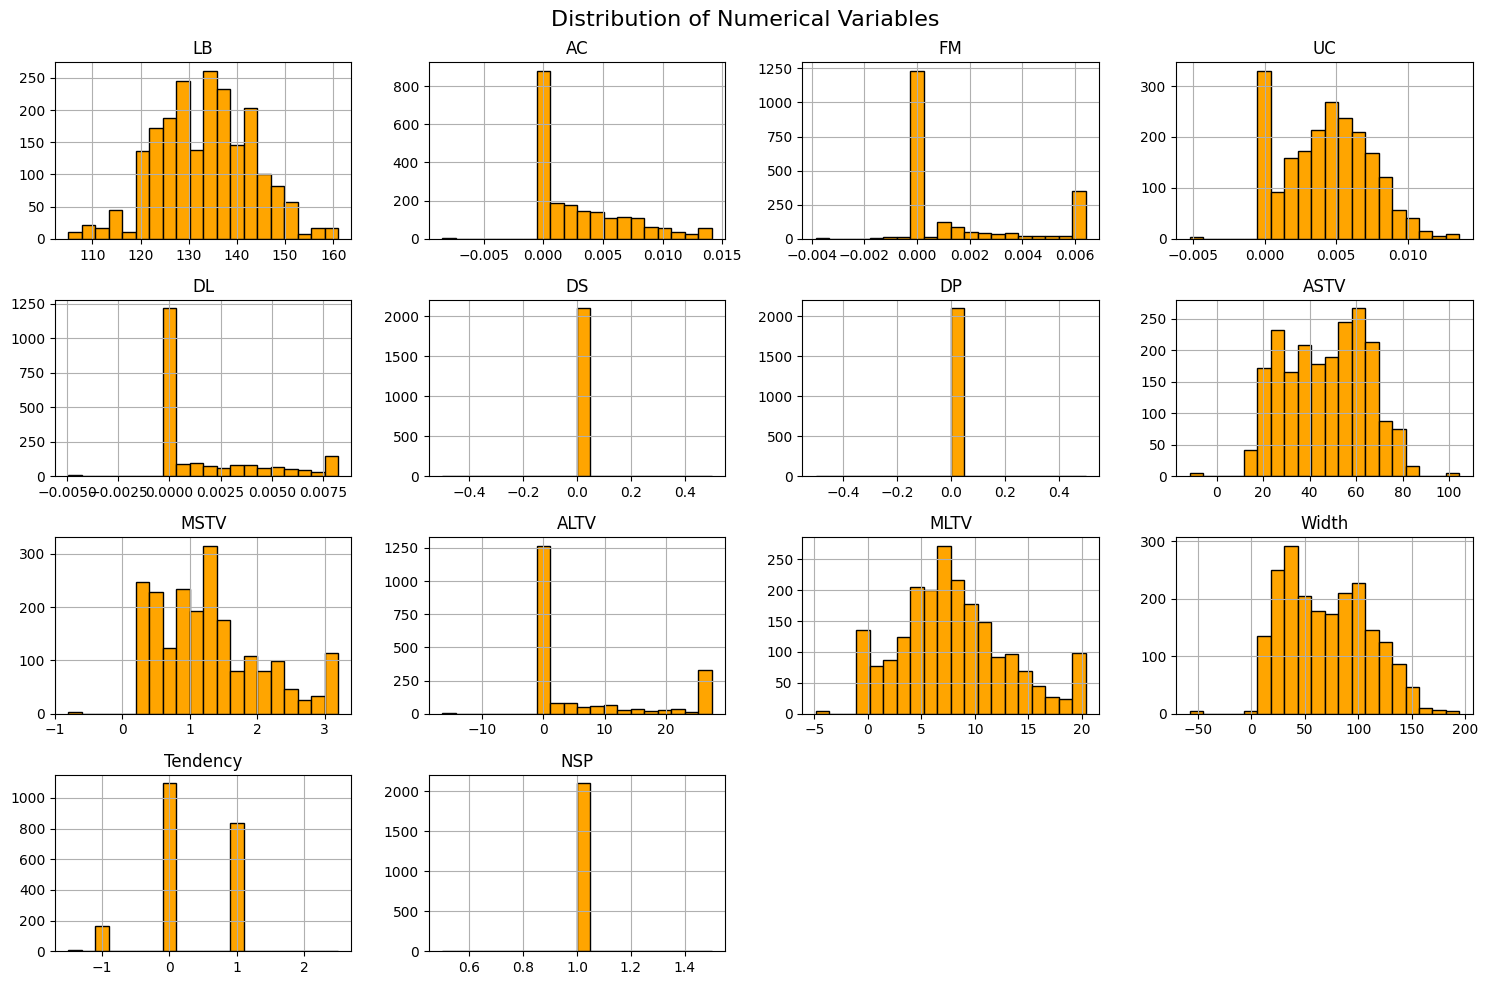

In [18]:
# Histograms
df.hist(bins=20, figsize=(15, 10), color='orange', edgecolor='black')
plt.suptitle("Distribution of Numerical Variables", fontsize=16)
plt.tight_layout()
plt.show()

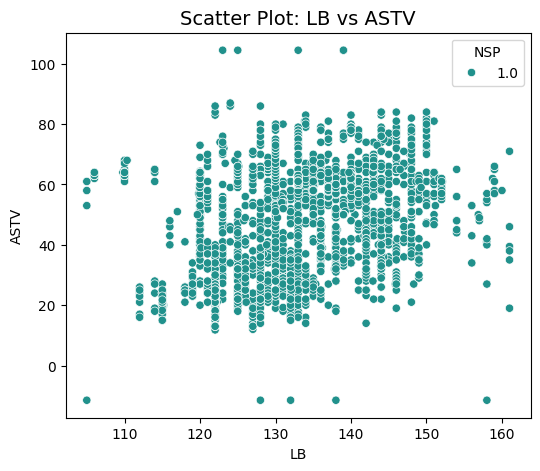

In [19]:
# Scatter plot (example)
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df, x='LB', y='ASTV', hue='NSP', palette='viridis')
plt.title("Scatter Plot: LB vs ASTV", fontsize=14)
plt.show()

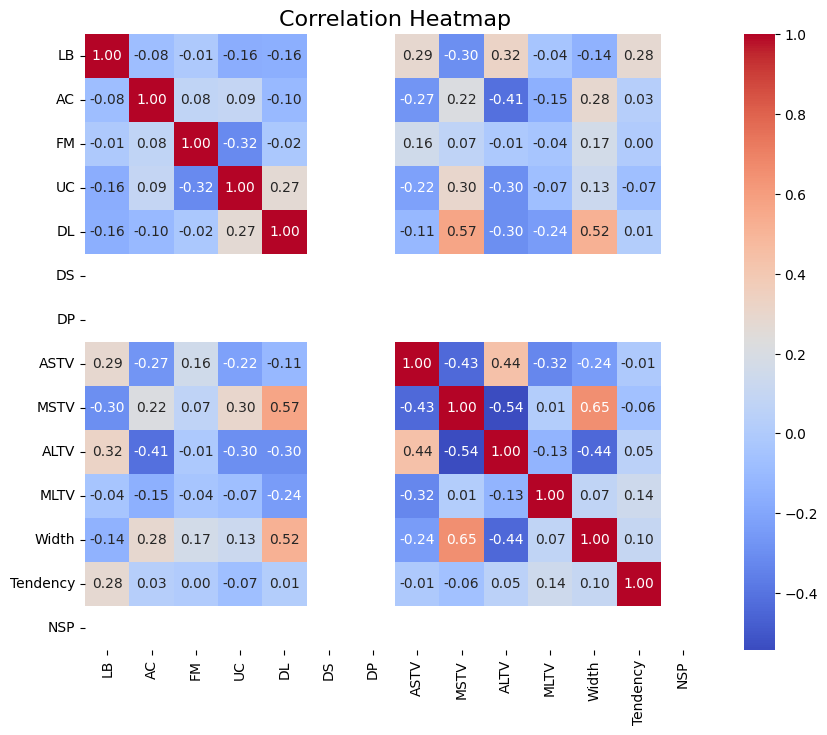

In [20]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [21]:
features = [col for col in df.columns if col != 'NSP']

C:\Users\adity\AppData\Local\Temp\ipykernel_24460\2587946342.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='NSP', y=col, data=df, palette="Set2")
C:\Users\adity\AppData\Local\Temp\ipykernel_24460\2587946342.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='NSP', y=col, data=df, palette="Set2")
C:\Users\adity\AppData\Local\Temp\ipykernel_24460\2587946342.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='NSP', y=col, data=df, palette="Set2")
C:\Users\adity\AppData\Local\Temp\ipykernel_24460\2587946342.py:5: FutureWar

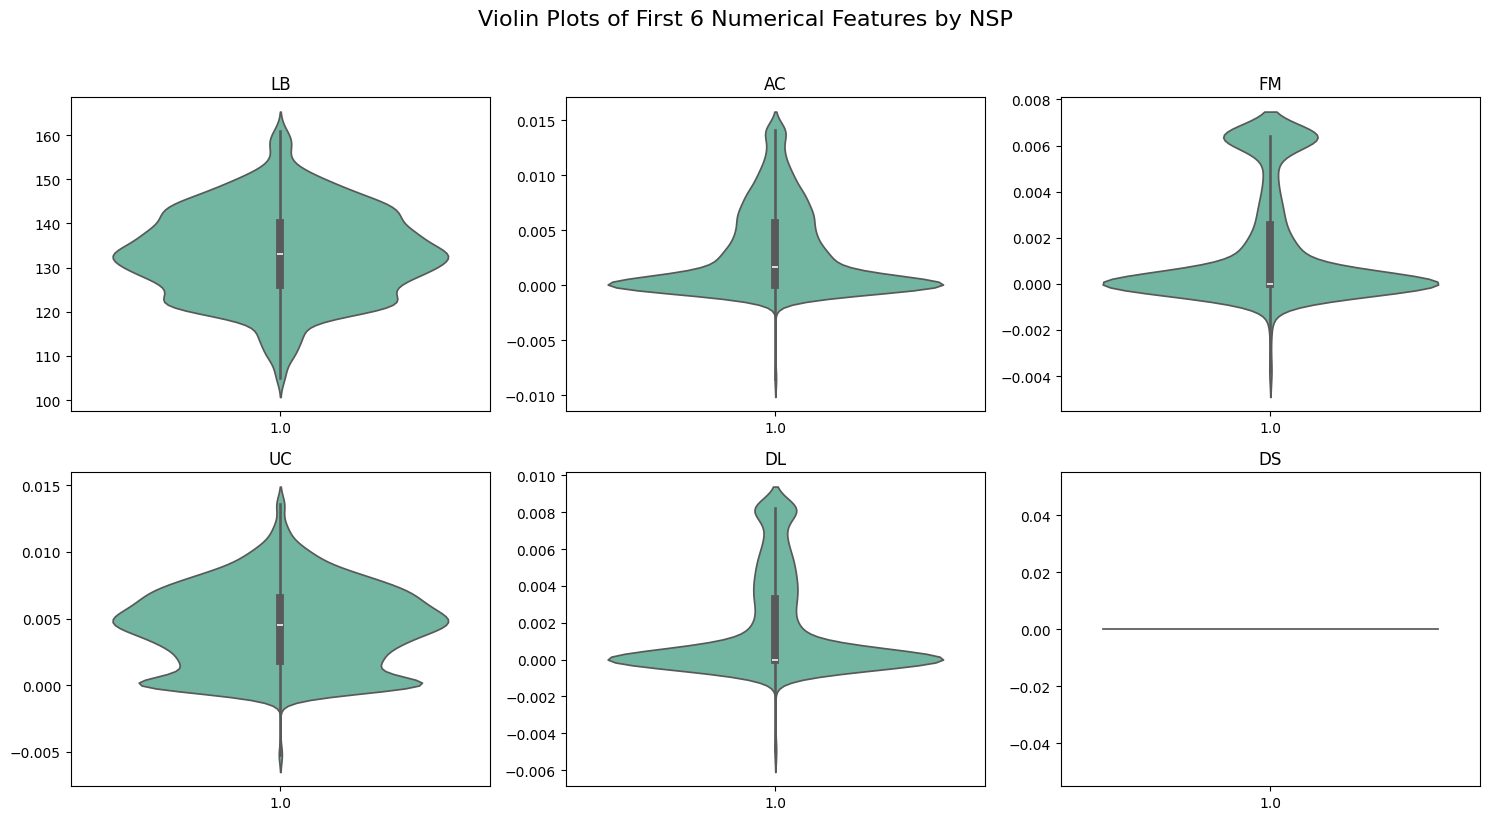

In [22]:
# Violin plots for numeric variables by NSP
plt.figure(figsize=(15, 8))
for i, col in enumerate(features[:6], 1):  # First 6 features
    plt.subplot(2, 3, i)
    sns.violinplot(x='NSP', y=col, data=df, palette="Set2")
    plt.title(col, fontsize=12)
    plt.xlabel("")
    plt.ylabel("")

plt.suptitle("Violin Plots of First 6 Numerical Features by NSP", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


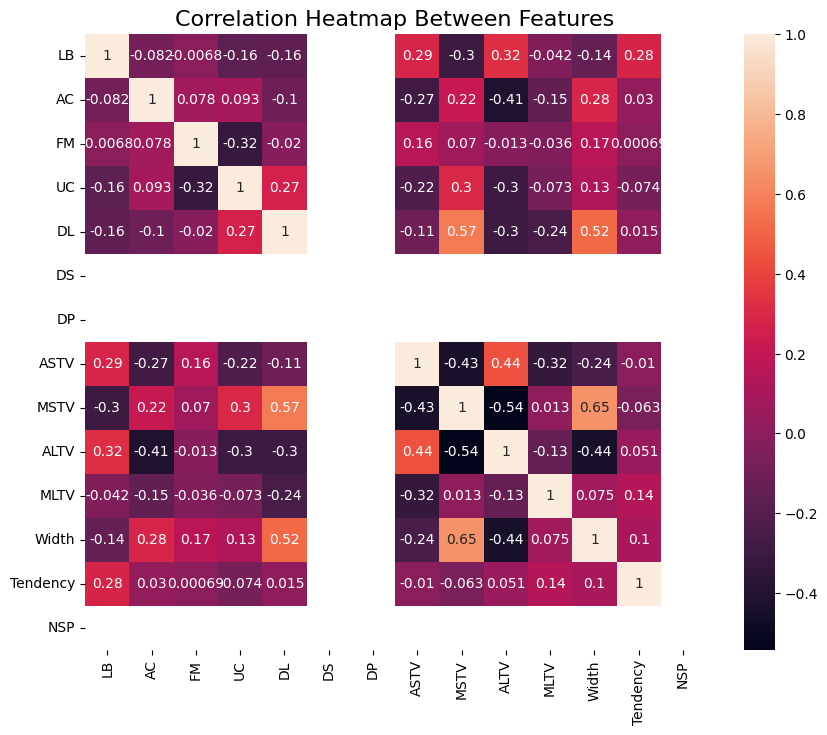

In [23]:
# Correlation Analysis
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.title("Correlation Heatmap Between Features", fontsize=16)
plt.show()

# Pattern Recognition and Insights


DL ↔ MSTV (0.57): Shows a moderately strong positive connection — as short-term variability increases, the number of decelerations also tends to rise.


MSTV ↔ Width (0.65): Represents a strong association, matching typical patterns observed in normal fetal variability.


ASTV ↔ ALTV (0.44): Reveals a moderate relationship, where both measures increase together, indicating active fetal movements.


DL ↔ Width (0.52): Suggests that higher variability width is often accompanied by more frequent decelerations.


LB ↔ ASTV / ALTV (~0.3): Shows a mild correlation, meaning baseline heart rate shifts slightly with changes in variability.


NSP weakly correlated: Indicates that the outcome is influenced by several features collectively rather than a single dominant factor.


DS, DP near-zero correlation: Implies they have very little impact and may not be strong contributors in prediction.



####    Temporal Insight (if temporary data is available)

Analyze how features like ASTV, MSTV, and DL change over time — rising trends may indicate fetal distress or activity cycles.

Stable LB and UC patterns over time suggest healthy baseline and uterine conditions.

Fluctuating variability (Width or Tendency) could reveal transitions between active and resting fetal states.

   ###  Conclusion

The dataset mainly includes numerical features, with moderate correlations appearing between certain pairs like MSTV–Width, DL–MSTV, and ASTV–ALTV. These relationships imply that these feature combinations may play a role in influencing fetal health outcomes.

Most other variables exhibit low correlation with one another, indicating that no single attribute strongly drives the NSP classification — instead, fetal health is determined by a combination of multiple physiological indicators.

Because strong correlations are limited, each feature contributes distinct information, which is advantageous for machine learning models as it allows them to capture a wider range of patterns.

If temporal data is analyzed, it could reveal evolving patterns in fetal condition, supporting early detection of potential distress.

Overall, these observations create a reliable basis for building predictive models and enhancing clinical decision-making, helping healthcare professionals evaluate fetal health more effectively.